In [16]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data = pd.ExcelFile("ckd.xlsx")
df = data.parse('All Data')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8819 entries, 0 to 8818
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8819 non-null   int64  
 1   Age               8819 non-null   int64  
 2   Female            8819 non-null   int64  
 3   Racegrp           8819 non-null   object 
 4   Educ              8799 non-null   float64
 5   Unmarried         8367 non-null   float64
 6   Income            7653 non-null   float64
 7   CareSource        8819 non-null   object 
 8   Insured           8706 non-null   float64
 9   Weight            8625 non-null   float64
 10  Height            8628 non-null   float64
 11  BMI               8529 non-null   float64
 12  Obese             8529 non-null   float64
 13  Waist             8505 non-null   float64
 14  SBP               8511 non-null   float64
 15  DBP               8439 non-null   float64
 16  HDL               8802 non-null   float64


In [5]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df.Racegrp.drop_duplicates()) 
df.Racegrp = le.transform(df.Racegrp)
# smoker or not
le.fit(df.CareSource.drop_duplicates()) 
df.CareSource = le.transform(df.CareSource)


In [11]:
df.corr()['CKD'].sort_values()

Activity           -0.119817
Income             -0.092472
DBP                -0.087266
CareSource         -0.078409
Educ               -0.059445
Height             -0.050380
Fam Hypertension   -0.045650
Fam CVD            -0.036685
HDL                -0.031826
Weight             -0.019161
Dyslipidemia        0.001812
BMI                 0.004539
Obese               0.008785
Female              0.014440
Fam Diabetes        0.017326
Total Chol          0.021847
ID                  0.032332
LDL                 0.033539
Anemia              0.056097
Waist               0.060799
Unmarried           0.063628
Smoker              0.067631
Racegrp             0.081826
PoorVision          0.100678
Insured             0.114911
Diabetes            0.155641
Stroke              0.160150
CHF                 0.162796
PVD                 0.168850
CVD                 0.214971
SBP                 0.216645
Hypertension        0.232705
Age                 0.367639
CKD                 1.000000
Name: CKD, dty

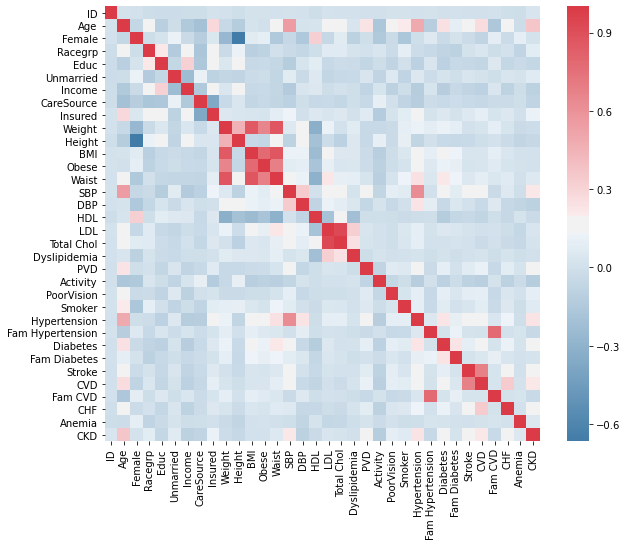

In [12]:
f, ax = pl.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

In [28]:
df.CKD.isnull().sum()

2819

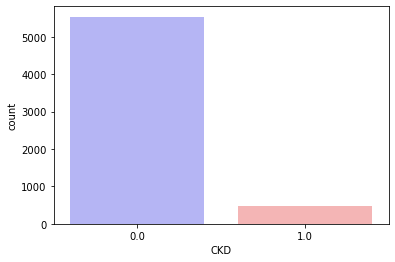

In [17]:
sns.countplot(x="CKD", data=df, palette="bwr")
plt.show()

In [20]:
countNoDisease = len(df[df.CKD == 0])
countHaveDisease = len(df[df.CKD == 1])
print("Percentage of Patients Haven't CKD: {:.2f}%".format((countNoDisease / (len(df.CKD))*100)))
print("Percentage of Patients Have CKD: {:.2f}%".format((countHaveDisease / (len(df.CKD))*100)))

Percentage of Patients Haven't CKD: 62.77%
Percentage of Patients Have CKD: 5.26%


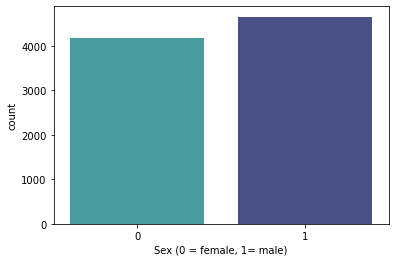

In [21]:
sns.countplot(x='Female', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [30]:
df.CKD.value_counts()

0.0    5536
1.0     464
Name: CKD, dtype: int64

In [23]:
countFemale = len(df[df.Female == 0])
countMale = len(df[df.Female == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.Female))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.Female))*100)))

Percentage of Female Patients: 47.27%
Percentage of Male Patients: 52.73%


In [24]:
df.groupby('CKD').mean()


,ID,Age,Female,Educ,Unmarried,Income,Insured,Weight,Height,BMI,...,Smoker,Hypertension,Fam Hypertension,Diabetes,Fam Diabetes,Stroke,CVD,Fam CVD,CHF,Anemia
CKD,,,,,,,,,,,,,,,,,,,,,
0.0,2984.287572,47.154263,0.520412,0.445129,0.366090,0.434005,0.791987,79.169323,167.254997,28.236463,...,0.295159,0.366040,0.235730,0.097019,0.308345,0.023142,0.049783,0.344606,0.020493,0.017893
1.0,3193.931034,73.051724,0.547414,0.334773,0.481735,0.261965,0.962719,77.737563,165.288785,28.345444,...,0.411638,0.790948,0.163793,0.280172,0.338362,0.127430,0.248380,0.278302,0.121739,0.047414


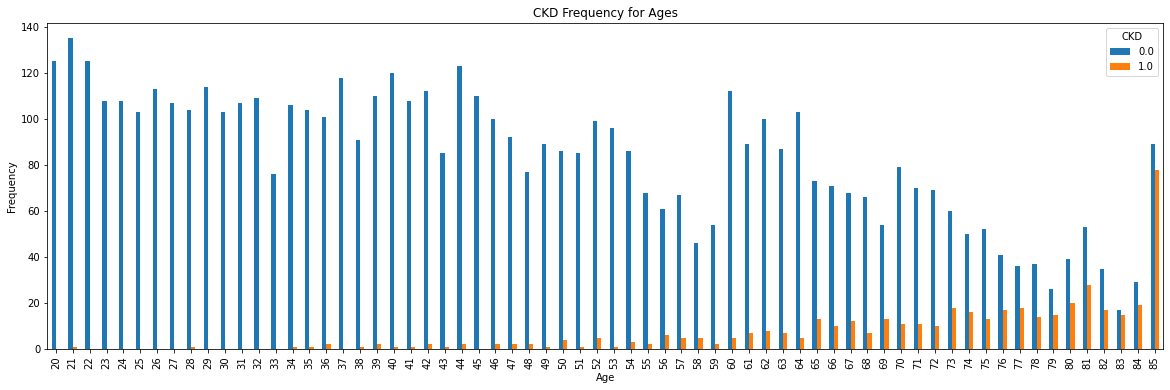

In [26]:
pd.crosstab(df.Age,df.CKD).plot(kind="bar",figsize=(20,6))
plt.title('CKD Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('CKDAndAges.png')
plt.show()

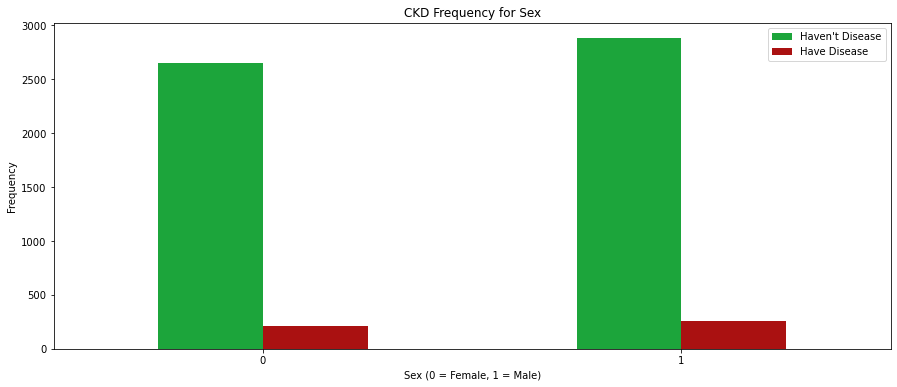

In [29]:
pd.crosstab(df.Female,df.CKD).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('CKD Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()